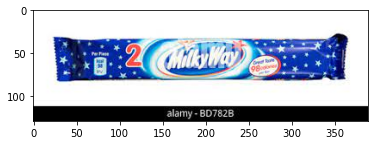

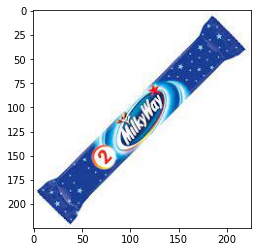

NameError: name 'ImageChops' is not defined

In [17]:
import matplotlib.pyplot as plt
from PIL.ImageChops import Image, subtract, multiply, screen, difference, add
# load two consecutive frame images from the video
im1 = Image.open("ch2.jfif")
plt.imshow(im1)
plt.show()
im2 = Image.open("ch1.jfif")
plt.imshow(im2)
plt.show()
im = ImageChops.difference(im1, im2)
#plt.figure(figsize=(40,50))
im.save("sportoutput.png")
plt.imshow(im)
plt.show()


In [2]:
#collage/montge
# importing the modules
import cv2
import numpy as np

# read all the images
# we are going to take 4 images only
image1=cv2.imread("index1.jfif")
image2=cv2.imread("index2.jfif")
image3=cv2.imread("index3.jfif")
image4=cv2.imread("index4.jfif")

# make all the images of same size 
#so we will use resize function
image1=cv2.resize(image1,(200,200))
image2=cv2.resize(image2,(200,200))
image3=cv2.resize(image3,(200,200))
image4=cv2.resize(image4,(200,200))

# Now how we will attach image with other image
# we will create a horizontal stack of images
# then we will add it to the vertical stack
# let the horizontal pair be (image1,image2)
# and (image3,image4)
# we will use numpy stack function
Horizontal1=np.hstack([image1,image2])
Horizontal2=np.hstack([image3,image4])

# Now the horizontal attachment is done
# noe vertical attachment
Vertical_attachment=np.vstack([Horizontal1,Horizontal2])

# Show the final attachment
cv2.imshow("Final Collage",Vertical_attachment)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
pip install keras-ocr

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


Looking for C:\Users\User\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\User\.keras-ocr\crnn_kurapan.h5
1/1 [==============================] - 1s 1s/step


True

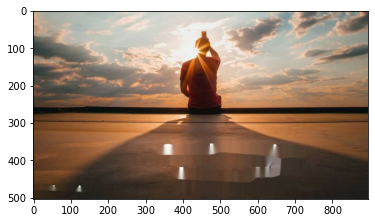

In [14]:
#remove a text from image
import matplotlib.pyplot as plt
import keras_ocr
import cv2
import math
import numpy as np
import tensorflow as tf
def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)
pipeline = keras_ocr.pipeline.Pipeline()
def inpaint_text(img_path, pipeline):
    # read image
    img = keras_ocr.tools.read('C:/Users/User/Desktop/gs.jpg')
    # generate (word, box) tuples
    prediction_groups = pipeline.recognize([img])
    mask = np.zeros(img.shape[:2], dtype="uint8")
    for box in prediction_groups[0]:
        x0, y0 = box[1][0]
        x1, y1 = box[1][1]
        x2, y2 = box[1][2]
        x3, y3 = box[1][3]
       
        x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
        x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)
       
        thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))
       
        cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255,    
        thickness)
        img = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)
                 
    return(img)

img_text_removed = inpaint_text('gs.jpg', pipeline)

plt.imshow(img_text_removed)

cv2.imwrite('text_removed_image.jpg', cv2.cvtColor(img_text_removed, cv2.COLOR_BGR2RGB))

In [20]:
#montage
import cv2
from PIL import Image
from skimage import io


IMAGE_WIDTH = 400
IMAGE_HEIGHT = 400

def create_collage(images):
    images = [io.imread(img) for img in images]
    images = [cv2.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT)) for image in images]
    if len(images) > 2:
        half = len(images) // 2
        h1 = cv2.hconcat(images[:half])
        h2 = cv2.hconcat(images[half:])
        concat_images = cv2.vconcat([h1, h2])
    else:
        concat_images = cv2.hconcat(images)
    image = Image.fromarray(concat_images)

    # Image path
    image_name = "montage.png"
    image = image.convert("RGB")
    image.save(f"{image_name}")
    return image_name
images=["index1.jfif","index2.jfif","index3.jfif","index4.jfif"]
#image1 on top left, image2 on top right, image3 on bottom left,image4 on bottom right
create_collage(images)


'montage.png'